In [264]:
import pandas as pd
import matplotlib.pyplot as plt

#### Load dataset

In [265]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv', header=0, delimiter=',')

df.info()
df.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- converting object type "TotalCharges" to numeric type
- handling missing values
- dropping "customerID" column and "tenure" == 0 rows

In [266]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df["TotalCharges"].fillna(df["TotalCharges"].mean(),inplace=True)

df.drop(labels=df[df["tenure"] == 0].index, axis = 0, inplace = True)
df.drop(['customerID'], axis=1, inplace=True)
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Exploratory Data Analysis
- Given dataset constitutes of 21 features
- The target variable is "Churn" which is a binary variable
- This dataset poses as a multivariate analytic problem (graphical)

<AxesSubplot:title={'center':'Monthly Charges Influence'}, xlabel='MonthlyCharges'>

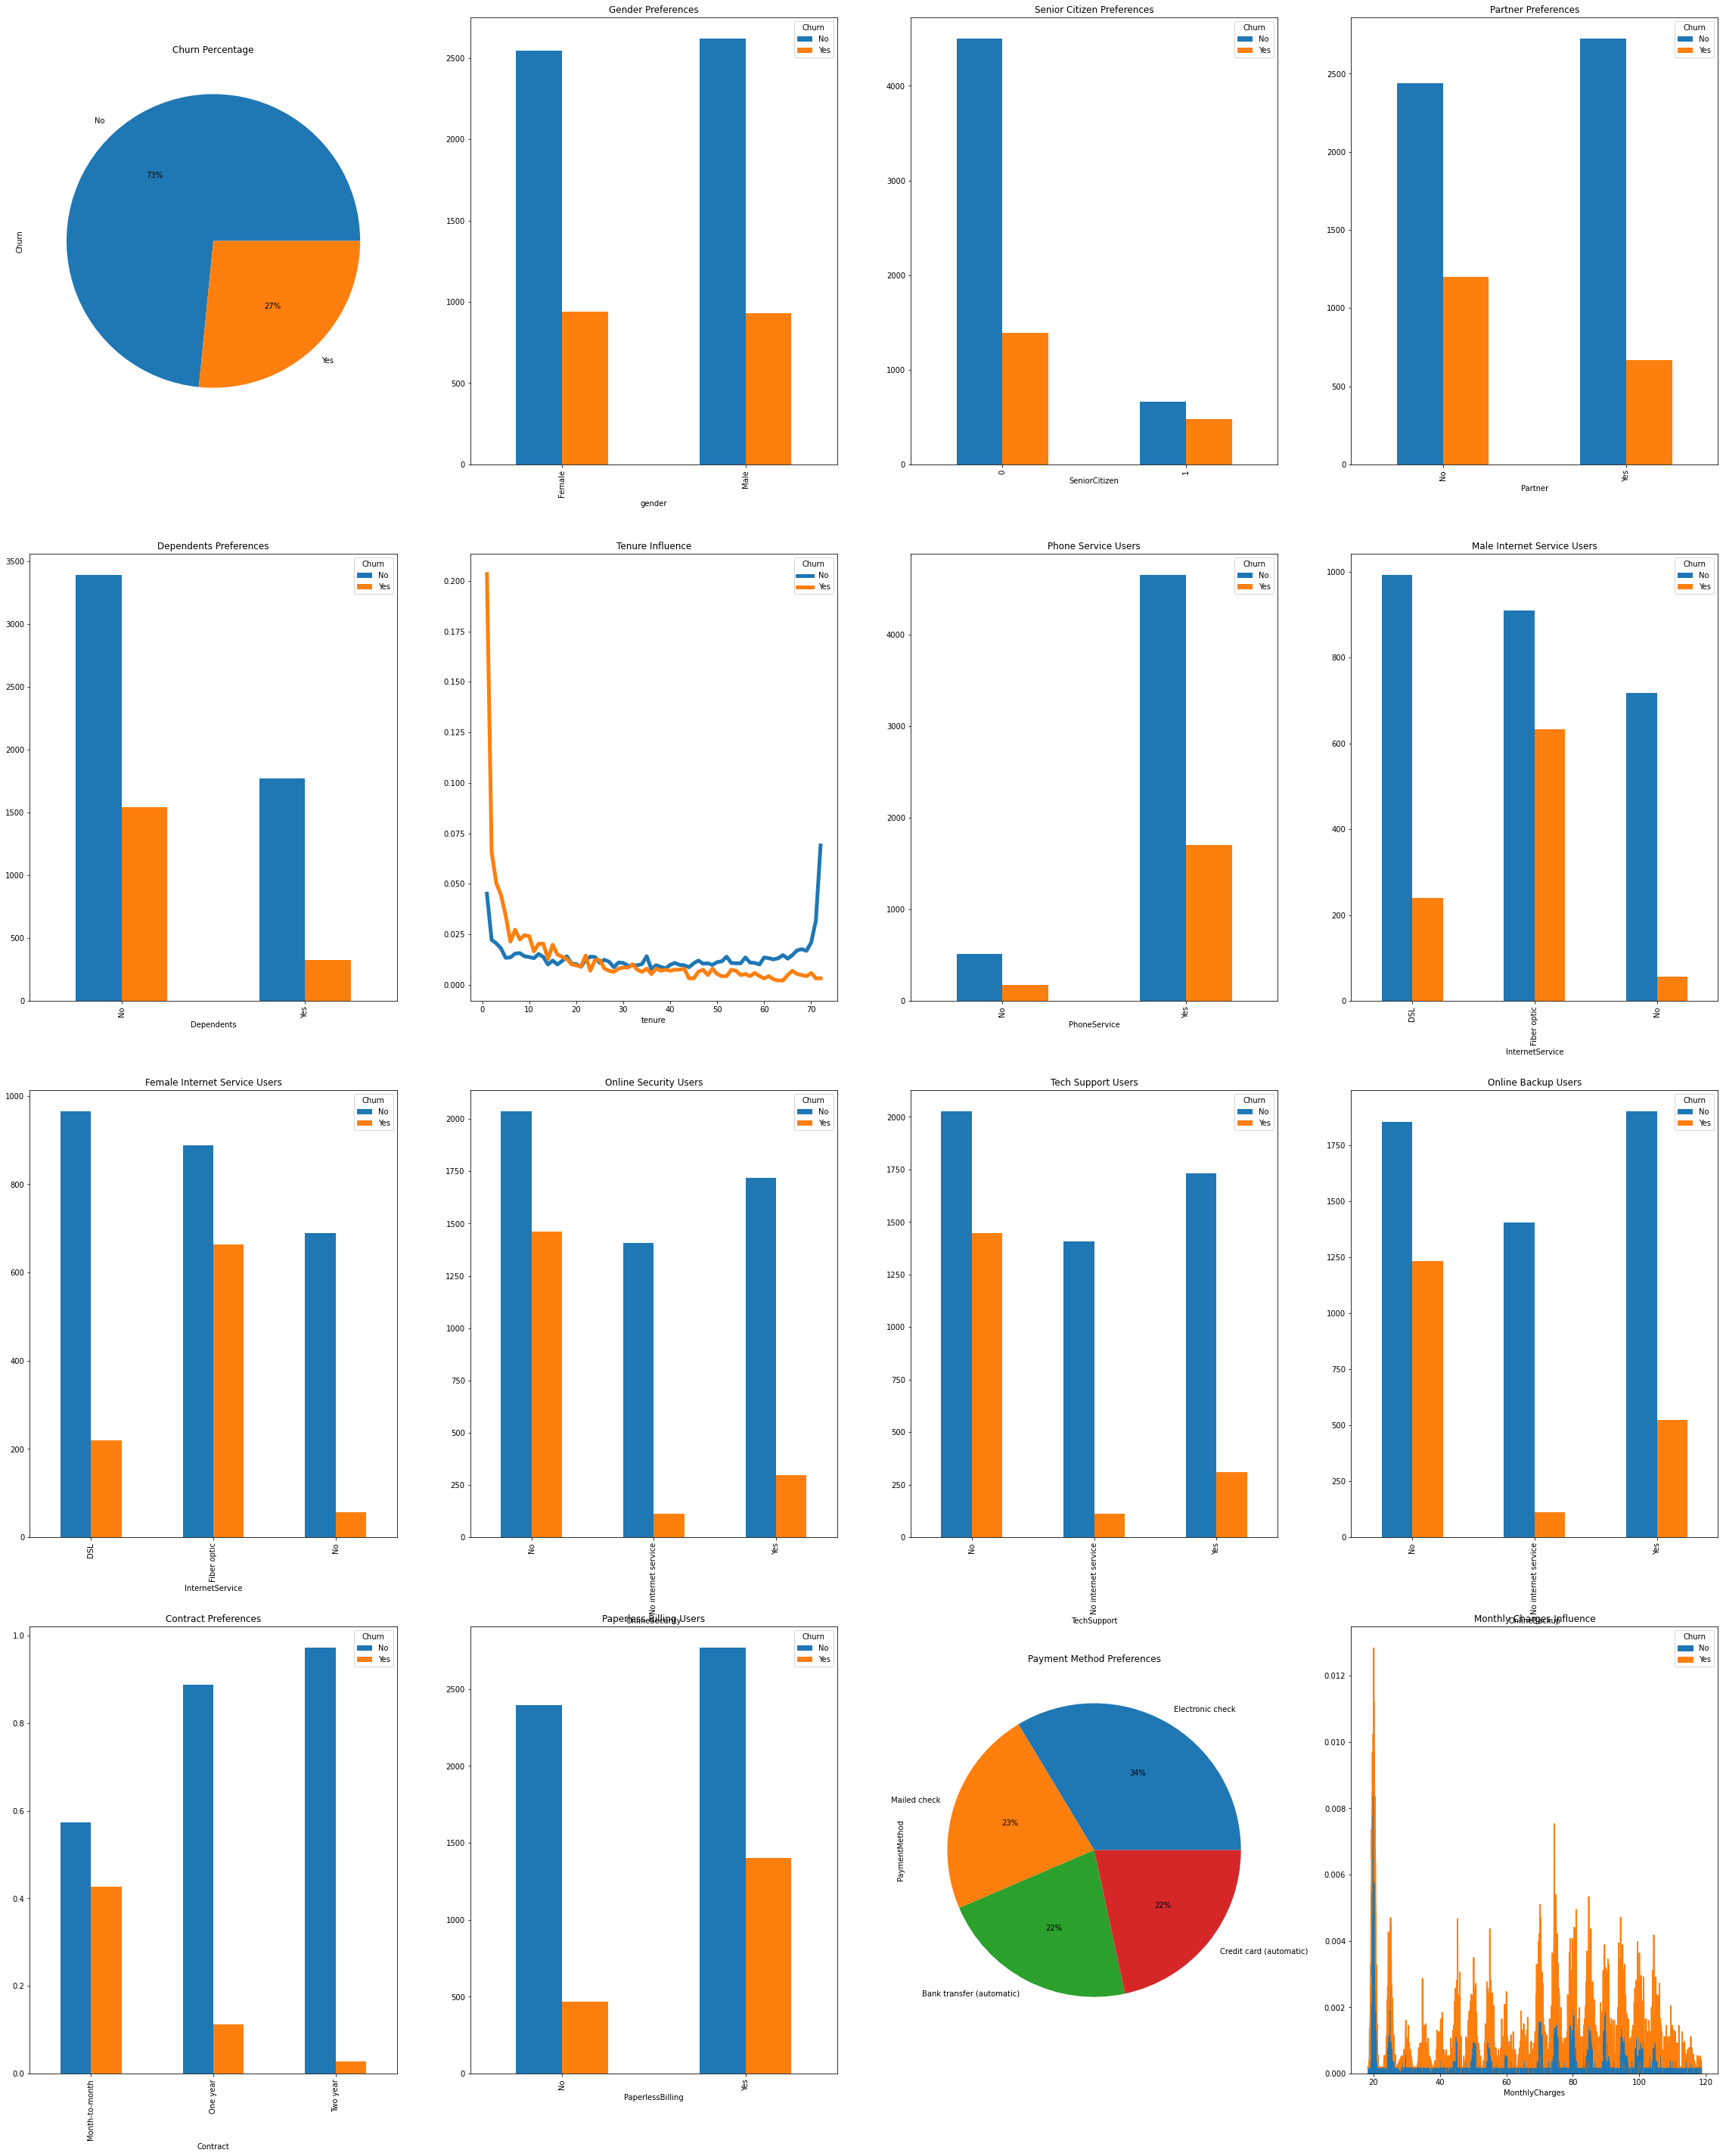

In [267]:
fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(40, 50))

df["Churn"].value_counts().plot(ax=axes[0, 0], kind="pie", autopct='%1.0f%%', title='Churn Percentage')
pd.crosstab(df["gender"],df["Churn"]).plot(ax=axes[0, 1], kind="bar", title='Gender Preferences')
pd.crosstab(df["SeniorCitizen"],df["Churn"]).plot(ax=axes[0, 2], kind="bar", title='Senior Citizen Preferences')
pd.crosstab(df["Partner"],df["Churn"]).plot(ax=axes[0, 3], kind="bar", title='Partner Preferences')
pd.crosstab(df["Dependents"],df["Churn"]).plot(ax=axes[1, 0], kind="bar", title='Dependents Preferences')
pd.crosstab(df["tenure"],df["Churn"],normalize="columns").plot(ax=axes[1, 1], kind="line", lw=5, title='Tenure Influence')
pd.crosstab(df["PhoneService"],df["Churn"]).plot(ax=axes[1, 2], kind="bar", title='Phone Service Users')
pd.crosstab(df[df["gender"]=="Male"]["InternetService"],df[df["gender"]=="Male"]["Churn"]).plot(ax=axes[1, 3], kind="bar", title='Male Internet Service Users')
pd.crosstab(df[df["gender"]=="Female"]["InternetService"],df[df["gender"]=="Female"]["Churn"]).plot(ax=axes[2, 0], kind="bar", title='Female Internet Service Users')
pd.crosstab(df["OnlineSecurity"],df["Churn"]).plot(ax=axes[2, 1], kind="bar", title='Online Security Users')
pd.crosstab(df["TechSupport"],df["Churn"]).plot(ax=axes[2, 2], kind="bar", title='Tech Support Users')
pd.crosstab(df["OnlineBackup"],df["Churn"]).plot(ax=axes[2, 3], kind="bar", title='Online Backup Users')
pd.crosstab(df["Contract"],df["Churn"],normalize="index").plot(ax=axes[3, 0], kind="bar", title='Contract Preferences')
pd.crosstab(df["PaperlessBilling"],df["Churn"]).plot(ax=axes[3, 1], kind="bar", title='Paperless Billing Users')
df['PaymentMethod'].value_counts().plot(ax=axes[3, 2], kind="pie", autopct='%1.0f%%', title='Payment Method Preferences')
pd.crosstab(df["MonthlyCharges"],df["Churn"],normalize="columns").plot(ax=axes[3, 3], kind="area", title='Monthly Charges Influence')

#### EDA Summary
- The dataset shows a trend of 73% of customers not churning
- Gender is not a major factor in churn
- Younger customers tend not to churn within the age group
- Customers with partners tend not to churn compared to those without partners
- Similarly, customers with dependents tend not to churn compared to those without dependents
- Churn rate decreases drastically with increase in tenure
- Customers with Phone Services availed tend to remain with the company
- A large number of customers with Fiber Optic Internet Service tend to churn; suggesting that the company needs to look into the quality of Fiber Optic services
- Customers with Online Security, Online Backup, Device Protection, Tech Support and Streaming TV services tend not to churn; suggesting that additional services are a good way to retain customers
- Customers with Month-to-Month contract tend to churn; as expected to try out the services before committing to a long term contract
- Different Payment Methods do not have a significant impact on churn
- Customers with lower monthly charges tend to churn more which can be justified for a trial period
  - although, churn rate is high for customers for almost all charges slab; suggesting that the company needs to look into the overall quality of services 

#### Label Encoding and One Hot Encoding

In [268]:
df["gender"]=df["gender"].map({"Female":0,"Male":1})
df["Partner"]=df["Partner"].map({"No":0,"Yes":1})
df["Dependents"]=df["Dependents"].map({"No":0,"Yes":1})
df["PhoneService"]=df["PhoneService"].map({"No":0,"Yes":1})
df["InternetService"]=df["InternetService"].map({"No":0,"DSL":1,"Fiber optic":2})
df["PaperlessBilling"]=df["PaperlessBilling"].map({"No":0,"Yes":1})
df["Churn"]=df["Churn"].map({"No":0,"Yes":1})

In [269]:
one_hot_col = ["MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaymentMethod"]
df = pd.get_dummies(df, columns=one_hot_col, drop_first=True)
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'InternetService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

#### Correlation Matrix
  - the following heatmap shows the correlation between the features
  - a few features are highly correlated with each other
    - TotalCharges and tenure; obviously
    - MonthlyCharges and InternetService; obviously
    - churn and InternetService have highest correlation; whereas churn and tenure have the lowest correlation
  
  ##### Conclusion
  - features do not show a strong correlation with other independent features and target
  - hence, feature selection/engineering is not expected to bring about a significant change in the model performance
  - with more data, we can expect to see a better correlation between the features

  ##### Note:
  - data augmentation could provide more data points
  - but randomized data augmentation would not be good estimate against the real world data

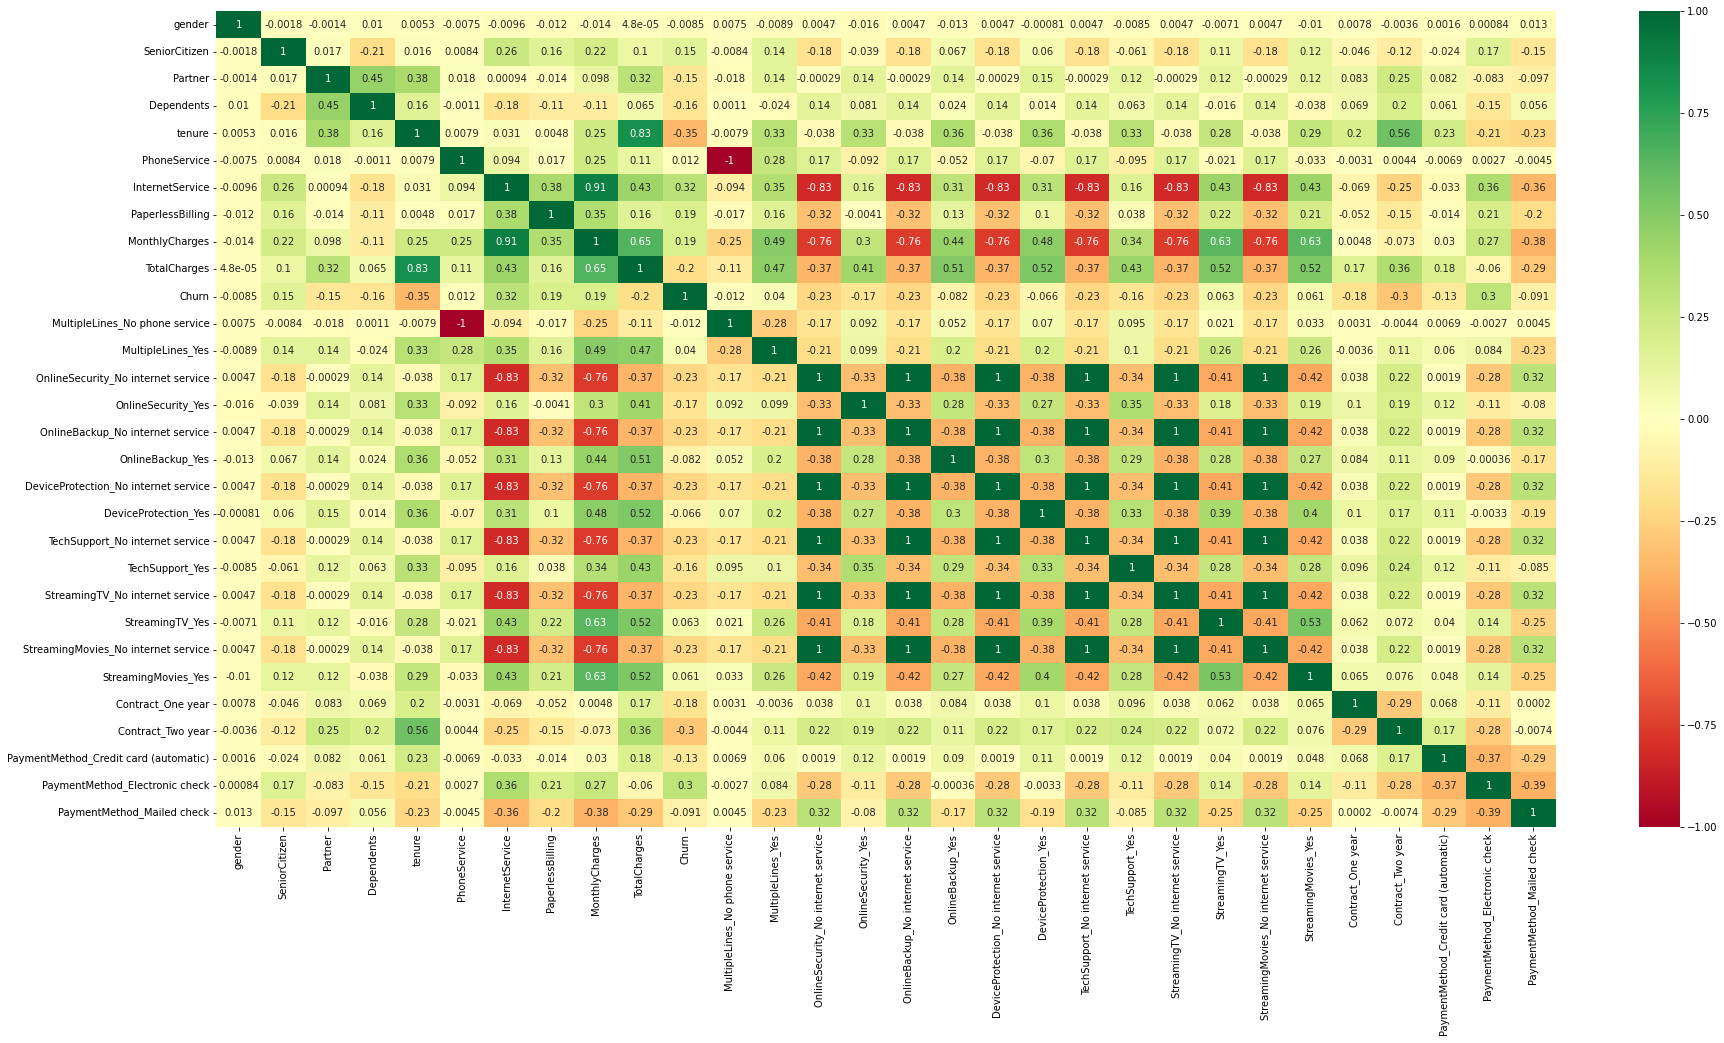

In [270]:
import seaborn as sns

plt.figure(figsize=(30, 15))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")
plt.show()

#### Model Building

In [271]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
import numpy as np

In [272]:
def evaluate_model(truth, prediction, probabilities):
    accuracy = metrics.accuracy_score(truth, prediction)
    recall = metrics.recall_score(truth, prediction)
    precision = metrics.precision_score(truth, prediction)
    f1 = metrics.f1_score(truth, prediction)
    auc = metrics.roc_auc_score(truth, prediction)

    result = {"Accuracy":accuracy, "Recall":recall, "Precision":precision, "F1 score":f1, "AUC":auc}

    fpr, tpr, threshold = metrics.roc_curve(truth, probabilities)
    
    plt.plot([0,1], [0,1], 'k--', label = "AUC: " + str(auc))
    plt.plot(fpr, tpr)
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.legend()
    plt.show()
    return result

Test Train Split

In [273]:
X = df.drop(columns = "Churn")
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state = 12)

##### Logistic Regression Classifier using GridSearchCV

In [274]:
lrc_pipe = Pipeline([('lrc', LogisticRegression())])
lrc_param_grid = {
        'lrc' : [LogisticRegression()],
        'lrc__penalty' : ['l1', 'l2'],
        'lrc__C' : np.logspace(-4, 4, 20),
        'lrc__solver' : ['liblinear'],
        'lrc__max_iter' : [200, 400, 600, 800, 1000],
    },

best_lrc = GridSearchCV(lrc_pipe, param_grid = lrc_param_grid, cv = 5, verbose=True, n_jobs=-1)

In [275]:
lrc_model = best_lrc.fit(X_train, y_train)
print(lrc_model.score(X_train, y_train))
print(lrc_model.score(X_val, y_val))

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
0.8044196088392177
0.8003554502369669


In [276]:
lrc_predictions = lrc_model.predict(X_test)
print(metrics.classification_report(y_test, lrc_predictions))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1062
           1       0.60      0.55      0.57       345

    accuracy                           0.80      1407
   macro avg       0.73      0.72      0.72      1407
weighted avg       0.79      0.80      0.80      1407



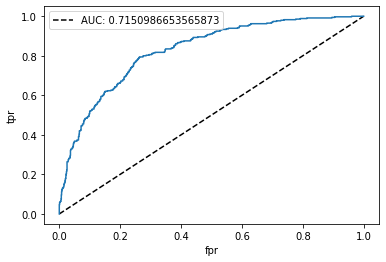

{'Accuracy': 0.798862828713575,
 'Recall': 0.5507246376811594,
 'Precision': 0.5974842767295597,
 'F1 score': 0.5731523378582203,
 'AUC': 0.7150986653565873}

In [277]:
lrc_probabilities = lrc_model.predict_proba(X_test)[:,1]
evaluate_model(y_test, lrc_predictions, lrc_probabilities)

##### Random Forest Classifier using RandomizedSearchCV

In [278]:
from sklearn.model_selection import RandomizedSearchCV

params_set = {
    "criterion": ["entropy", "gini"],
    "max_depth": [9,11,13,15,17,19],
    "min_samples_split": [10,20,40,60],
    "min_samples_leaf": [2,5,20,10],
    "n_estimators": [50,100,150],
    "bootstrap": [True],
    "max_features": ["sqrt","log2"],
    "max_samples": [0.5,0.8,1.0],
    }

random_rfc = RandomizedSearchCV(RandomForestClassifier(), params_set, n_iter=100, cv=5, verbose=True, n_jobs=-1)

In [279]:
rrfc_model = random_rfc.fit(X_train, y_train)
print(rrfc_model.score(X_train, y_train))
print(rrfc_model.score(X_val, y_val))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
0.841249682499365
0.7968009478672986


In [280]:
rrfc_predictions = rrfc_model.predict(X_test)
print(metrics.classification_report(y_test, rrfc_predictions))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1062
           1       0.63      0.51      0.57       345

    accuracy                           0.81      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.80      0.81      0.80      1407



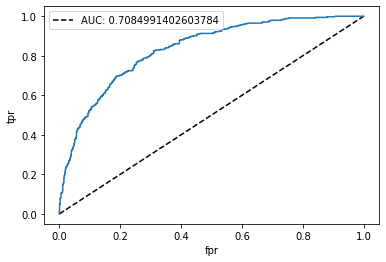

{'Accuracy': 0.8081023454157783,
 'Recall': 0.5130434782608696,
 'Precision': 0.6344086021505376,
 'F1 score': 0.5673076923076923,
 'AUC': 0.7084991402603784}

In [281]:
rrfc_probabilities = rrfc_model.predict_proba(X_test)[:,1]
evaluate_model(y_test, rrfc_predictions, rrfc_probabilities)

##### Random Forest Classifier using GridSearchCV

In [282]:
rfc_pipe = Pipeline([('rfc' , RandomForestClassifier())])
rfc_param_grid = [
    {
        'rfc' : [RandomForestClassifier()],
        'rfc__criterion' : ['gini', 'entropy', 'log_loss'],
        'rfc__max_depth' : list(range(7,22,2)),
        'rfc__min_samples_split' : list(range(2,10,2)),
        'rfc__min_samples_leaf' : list(range(2,25,5)),
        'rfc__n_estimators' : list(range(10,200,50)),
        'rfc__bootstrap' : [True],
        'rfc__max_features' : ['sqrt', 'log2'],
        'rfc__max_samples' : [0.5, 0.8, 1.0]
    },  
]

best_rfc = GridSearchCV(rfc_pipe, param_grid = rfc_param_grid, cv = 5, verbose=True, n_jobs=-1)

In [283]:
rfc_model = best_rfc.fit(X_train, y_train)
print(rfc_model.score(X_train, y_train))
print(rfc_model.score(X_val, y_val))

Fitting 5 folds for each of 11520 candidates, totalling 57600 fits
0.8161036322072645
0.7867298578199052


In [284]:
rfc_predictions = rfc_model.predict(X_test)
print(metrics.classification_report(y_test, rfc_predictions))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1062
           1       0.61      0.49      0.55       345

    accuracy                           0.80      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.79      0.80      0.79      1407



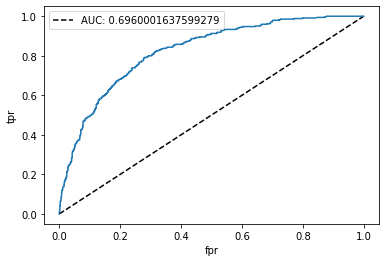

{'Accuracy': 0.7995735607675906,
 'Recall': 0.4927536231884058,
 'Precision': 0.6137184115523465,
 'F1 score': 0.5466237942122186,
 'AUC': 0.6960001637599279}

In [285]:
rfc_probabilities = rfc_model.predict_proba(X_test)[:,1]
evaluate_model(y_test, rfc_predictions, rfc_probabilities)

##### Comparing model performances
| Model | Logistic Regression + GridSearchCV | Random Forest + RandomizedSearchCV | Random Forest + GridSearchCV |
| :---: | :---: | :---: | :---: |
| Accuracy | 0.79886 | 0.80810 | 0.79957 |
| Recall | 0.55072 | 0.51304 | 0.49275 |
| Precision | 0.59748 | 0.63441 | 0.61372 |
| F1 Score | 0.57315 | 0.56731 | 0.54662 |
| AUC | 0.71510 | 0.70850 | 0.69600 |

- Random Forest Classifier has the best accuracy
- Although Logistic Regression Classifier with GridSearchCV has the best ROC AUC score

##### Conclusion
- Given the dataset, Logistic Regression Classifier with GridSearchCV is the best model to predict churn given a moderate feature set
- With more data, we can expect to see a better model performance; especially with Random Forest Classifier
- Additionally, for a skewed class problem, data augmentation requires feature importance to be considered to build a weighted loss function, which can improve the `accuracy` of the model
- But, for the given problem, `accuracy` is not a good metric to evaluate the model performance
- Instead, `ROC AUC score` and `F1 score` are better metrics to evaluate the model performance here

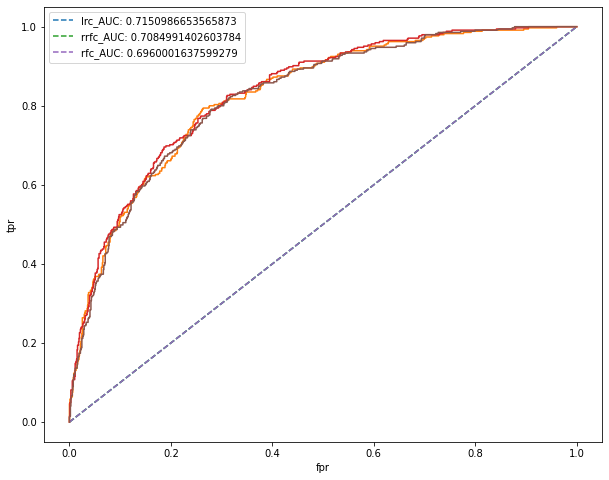

In [286]:
def compare_models(models):
    for model in models:
        truth = y_test
        probs = model+ "_probabilities"
        preds = model+ "_predictions"

        auc = metrics.roc_auc_score(truth, eval(preds))
        fpr, tpr, threshold = metrics.roc_curve(truth, eval(probs))

        plt.plot([0,1], [0,1], '--', label = model + "_AUC: " + str(auc))
        plt.plot(fpr, tpr)
        plt.xlabel('fpr')
        plt.ylabel('tpr')
        plt.legend()
    
plt.figure(figsize=(10, 8))
compare_models(["lrc", "rrfc", "rfc"])